In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib


In [7]:
import pandas as pd

df = pd.read_csv("mushrooms.csv")
df.head()


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("mushrooms.csv")

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)


In [12]:
cat_features = X.columns.tolist() 


In [21]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)



ordinal = ColumnTransformer([
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_features)
])


In [22]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("mushrooms.csv")   

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Preprocessing: OneHotEncoder
onehot = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output=False), X.columns)
    ]
)

# Pipeline: Encoding + Logistic Regression
model = Pipeline([
    ("preprocess", onehot),
    ("lr", LogisticRegression(max_iter=2000))
])


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9993846153846154

Confusion Matrix:
 [[842   0]
 [  1 782]]

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



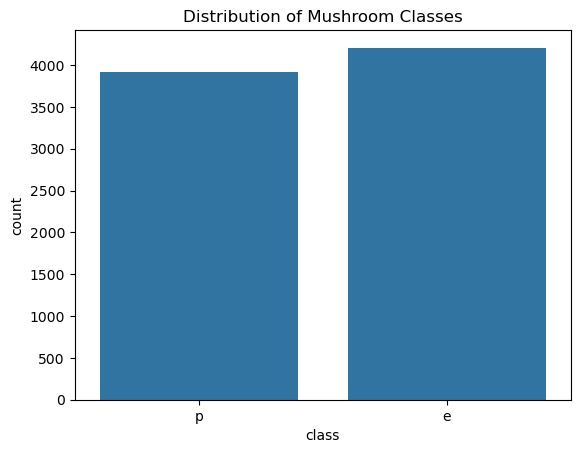

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["class"])
plt.title("Distribution of Mushroom Classes")
plt.show()


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("mushrooms.csv")   

# Separate features & target
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_encoded, y_train)

y_pred_dt = dt.predict(X_test_encoded)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))

print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest Model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_encoded, y_train)

y_pred_rf = rf.predict(X_test_encoded)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Confusion Matrix:
 [[843   0]
 [  0 782]]

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after encoding
feature_names = encoder.get_feature_names_out(X.columns)

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.show()


CategoricalNB Accuracy: 0.9458461538461539

Confusion Matrix:
 [[835   7]
 [ 81 702]]

Classification Report:
               precision    recall  f1-score   support

           e       0.91      0.99      0.95       842
           p       0.99      0.90      0.94       783

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



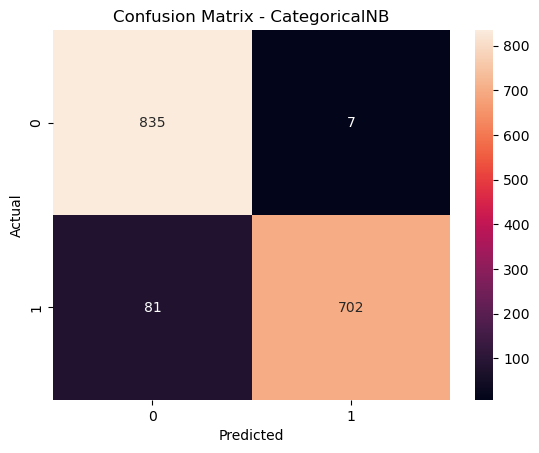

In [28]:
#  navie bayes CategoricalNB with OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB  # sklearn >= 1.1
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Reload original X, y and train/test split if session restarted:
import pandas as pd
df = pd.read_csv("mushrooms.csv")
X = df.drop(columns=["class"])
y = df["class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ordinal encode each column (fit on train, transform train+test)
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train_ord = ord_enc.fit_transform(X_train)
X_test_ord = ord_enc.transform(X_test)

# Train CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train_ord, y_train)

# Predict & evaluate
y_pred_nb = cnb.predict(X_test_ord)
print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - CategoricalNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune K later
knn.fit(X_train_encoded, y_train)

y_pred_knn = knn.predict(X_test_encoded)

# Results
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.49230769230769234

Confusion Matrix:
 [[448 394]
 [431 352]]

Classification Report:
               precision    recall  f1-score   support

           e       0.51      0.53      0.52       842
           p       0.47      0.45      0.46       783

    accuracy                           0.49      1625
   macro avg       0.49      0.49      0.49      1625
weighted avg       0.49      0.49      0.49      1625



In [30]:
import matplotlib.pyplot as plt

accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)
    y_pred = knn.predict(X_test_encoded)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy_scores, marker="o")
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("mushrooms.csv")

# Split features & target
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SVM Model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_encoded, y_train)

y_pred_svm = svm.predict(X_test_encoded)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0

Confusion Matrix:
 [[842   0]
 [  0 783]]

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [33]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_encoded, y_train)

y_pred_lin = svm_linear.predict(X_test_encoded)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))


Linear SVM Accuracy: 1.0
